___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import numpy as np
import pandas as pd

In [3]:
bn = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [4]:
bn.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

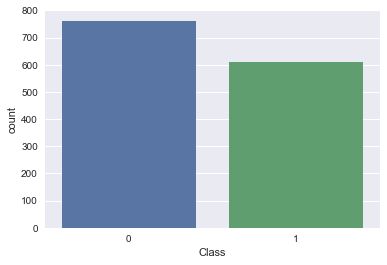

In [6]:
sns.countplot(x='Class', data=bn)

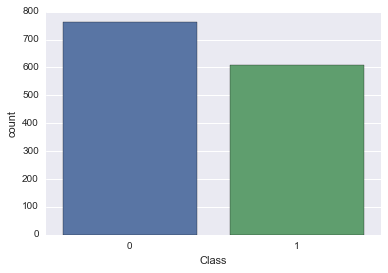

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

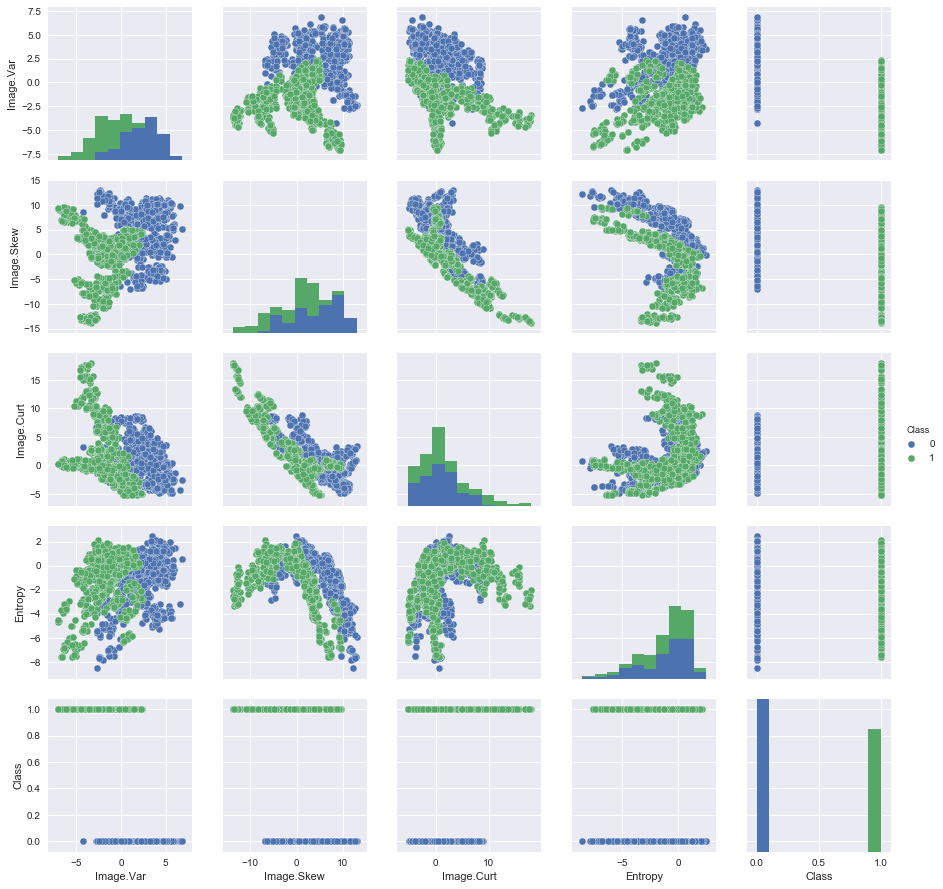

In [7]:
sns.pairplot(bn, hue='Class')

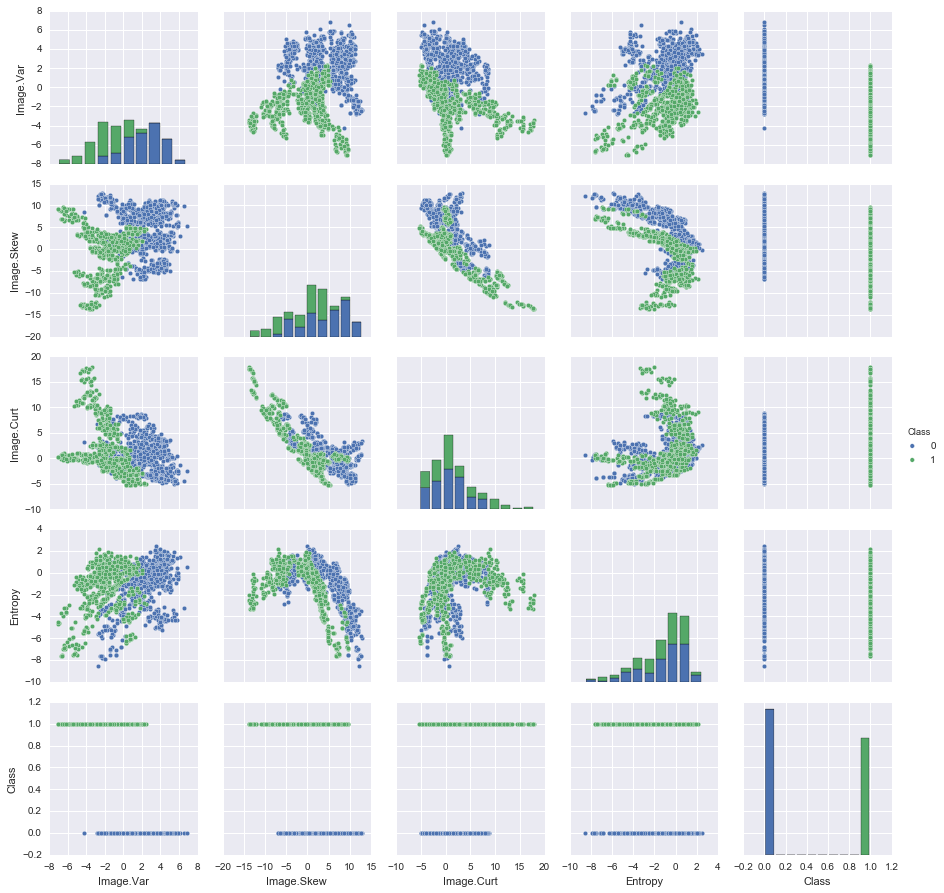

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [9]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [10]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [13]:
scaler.fit(bn.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [19]:
bn_scaled = scaler.transform(bn.drop('Class', axis=1), bn['Class'])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [25]:
df_scaled = pd.DataFrame(bn_scaled, columns=bn.columns[1:])
df_scaled.head()

,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [89]:
X = df_scaled

In [88]:
y = bn['Class']

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [90]:
X = X.as_matrix()
y = y.as_matrix()

In [91]:
print(X.shape)
print(y.shape)
print(X.dtype)
print(y.dtype)

(1372, 4)
(1372,)
float64
int64


** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [94]:
import tensorflow.contrib.learn as learn
from tensorflow.contrib.layers import feature_column

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [95]:
columns = [feature_column.real_valued_column('', dimension=4)]
classifier = learn.DNNClassifier(feature_columns=columns,
                                 hidden_units=[10,20,10],
                                 n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1211c7c18>, '_master': '', '_num_ps_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000}


** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [96]:
classifier.fit(X_train, y_train, steps=200)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/ma332725/anaconda/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/tc/76ll82rd03l38068bz531y2x9hwtfd/T/tmpo3tef_3c/model.ckpt.
INFO:tensorflow:loss = 0.698545, step = 1
INFO:tensorflow:global_step/sec: 449.128
INFO:tensorflow:loss = 0.0562336, step = 101
INFO:tensorflow:Saving checkpoints for 200 into /var/folders/tc/76ll82rd03l38068bz531y2x9hwtfd/T/tmpo3tef_3c/model.ckpt.
INFO:tensorflow:Loss for final step: 0.0121957.


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1211c7b70>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x11b0a46a8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [97]:
predictions = list(classifier.predict(X_test))
predictions

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/ma332725/anaconda/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
print(confusion_matrix(y_test, predictions))

[[232   0]
 [  0 180]]


[[237   0]
 [  1 174]]


In [101]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       232
          1       1.00      1.00      1.00       180

avg / total       1.00      1.00      1.00       412



             precision    recall  f1-score   support

          0       1.00      1.00      1.00       237
          1       1.00      0.99      1.00       175

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier(n_estimators=10)

In [104]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [106]:
rfc_predictions = rfc.predict(X_test)

In [108]:
print(confusion_matrix(y_test, rfc_predictions))

[[232   0]
 [  0 180]]


In [109]:
print(classification_report(y_test, rfc_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       232
          1       1.00      1.00      1.00       180

avg / total       1.00      1.00      1.00       412



             precision    recall  f1-score   support

          0       1.00      0.98      0.99       237
          1       0.98      0.99      0.99       175

avg / total       0.99      0.99      0.99       412



[[233   4]
 [  1 174]]


** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!